<h1> League Winner</h1>
Name: Pratham Mishra


<h3>Cleaning</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("pl-tables-1996-2024.csv")

In [3]:
print(df.shape)
df.head()

(580, 12)


,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1996,Manchester Utd,1,38,25,7,6,73,35,38,82,→ Champions League via league finish
1,1996,Newcastle Utd,2,38,24,6,8,66,37,29,78,→ UEFA Cup via league finish
2,1996,Liverpool,3,38,20,11,7,70,34,36,71,→ UEFA Cup Winners' Cup via cup win 1
3,1996,Aston Villa,4,38,18,9,11,52,35,17,63,→ UEFA Cup via league finish
4,1996,Arsenal,5,38,17,12,9,49,32,17,63,→ UEFA Cup via league finish 2


In [4]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season_end_year  580 non-null    int64 
 1   team             580 non-null    object
 2   position         580 non-null    int64 
 3   played           580 non-null    int64 
 4   won              580 non-null    int64 
 5   drawn            580 non-null    int64 
 6   lost             580 non-null    int64 
 7   gf               580 non-null    int64 
 8   ga               580 non-null    int64 
 9   gd               580 non-null    int64 
 10  points           580 non-null    int64 
 11  notes            300 non-null    object
dtypes: int64(10), object(2)
memory usage: 54.5+ KB


,season_end_year,position,played,won,drawn,lost,gf,ga,gd,points
count,580.000000,580.000000,580.0,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,2010.000000,10.500000,38.0,14.218966,9.562069,14.218966,51.217241,51.217241,0.000000,52.177586
std,8.373822,5.771259,0.0,5.825498,2.843884,5.472682,15.537943,12.990406,25.421898,16.696866
min,1996.000000,1.000000,38.0,1.000000,2.000000,0.000000,20.000000,15.000000,-69.000000,11.000000
25%,2003.000000,5.750000,38.0,10.000000,7.000000,10.000000,40.000000,43.000000,-17.000000,41.000000
50%,2010.000000,10.500000,38.0,13.000000,9.000000,15.000000,48.000000,51.000000,-5.500000,49.000000
75%,2017.000000,15.250000,38.0,18.000000,11.000000,18.000000,59.250000,59.000000,15.000000,63.000000
max,2024.000000,20.000000,38.0,32.000000,17.000000,29.000000,106.000000,104.000000,79.000000,100.000000


In [5]:
#is_champion will be the "y"
df['is_champion'] = (df['position'] == 1).astype(int)

In [6]:
#removing positions and points because they directly give us the answer. This will result in data leakage as the model will end up memorizing it instead of learning anything.
columns_to_drop = ['team','position', 'points', 'notes']
df = df.drop(columns=columns_to_drop)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') # for col names
print(df.isnull().sum())


season_end_year    0
played             0
won                0
drawn              0
lost               0
gf                 0
ga                 0
gd                 0
is_champion        0
dtype: int64


In [7]:
print(df.shape)

(580, 9)


In [8]:
df = df.dropna(subset=['played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd']) #if these critical cols have null values then I am removing them


In [9]:
print(df.shape)

(580, 9)


In [10]:
df = df.drop_duplicates()

In [11]:
print(df.shape)

(580, 9)


In [12]:
#ensuring that numeric cols are numericall olny
numeric_cols = ['played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [13]:
df.head()

,season_end_year,played,won,drawn,lost,gf,ga,gd,is_champion
0,1996,38,25,7,6,73,35,38,1
1,1996,38,24,6,8,66,37,29,0
2,1996,38,20,11,7,70,34,36,0
3,1996,38,18,9,11,52,35,17,0
4,1996,38,17,12,9,49,32,17,0


<h3>EDA</h3>

In [14]:
print("Shape of dataset:", df.shape)
print("\nData types & null counts:")
print(df.info())
print("\nSummary statistics:")
print(df.describe().T)

Shape of dataset: (580, 9)

Data types & null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   season_end_year  580 non-null    int64
 1   played           580 non-null    int64
 2   won              580 non-null    int64
 3   drawn            580 non-null    int64
 4   lost             580 non-null    int64
 5   gf               580 non-null    int64
 6   ga               580 non-null    int64
 7   gd               580 non-null    int64
 8   is_champion      580 non-null    int64
dtypes: int64(9)
memory usage: 40.9 KB
None

Summary statistics:
                 count         mean        std     min     25%     50%  \
season_end_year  580.0  2010.000000   8.373822  1996.0  2003.0  2010.0   
played           580.0    38.000000   0.000000    38.0    38.0    38.0   
won              580.0    14.218966   5.825498     1.0    10.0    13.0 

In [15]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
season_end_year    0
played             0
won                0
drawn              0
lost               0
gf                 0
ga                 0
gd                 0
is_champion        0
dtype: int64


<h3> Correlation Analysis</h3>

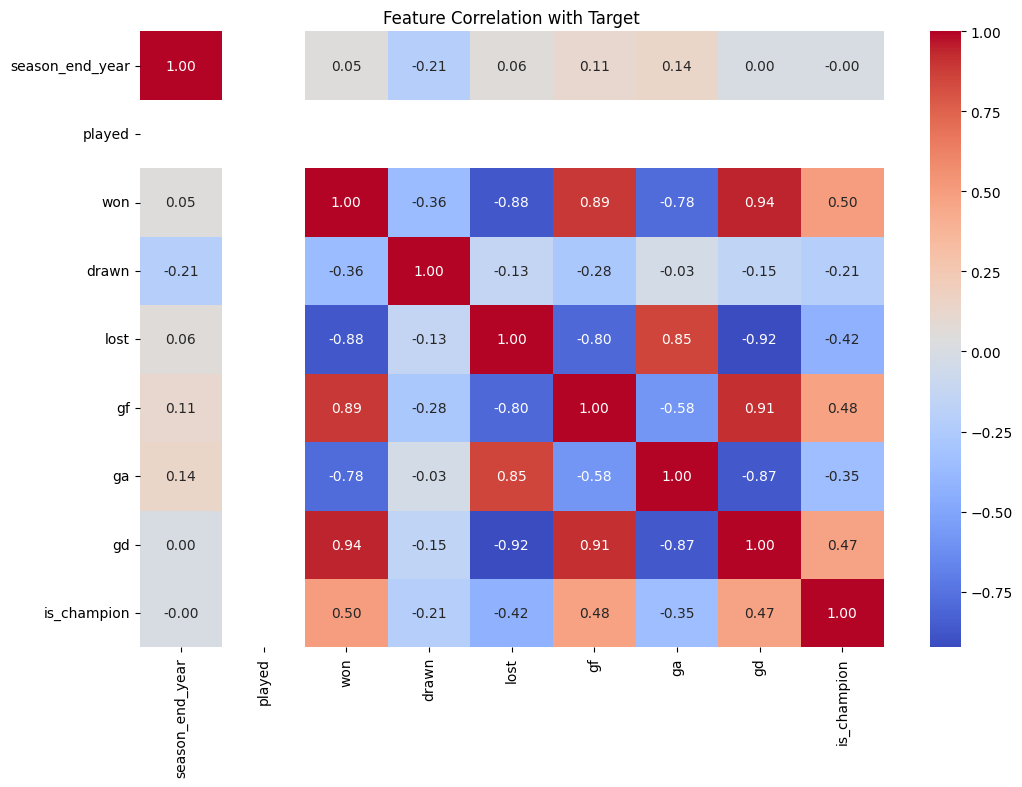

In [16]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist() #list of cols
numeric_features.remove('is_champion')
corr_matrix = df[numeric_features + ['is_champion']].corr() #makes matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Target")
plt.show()
#played is giving blank because it is connstant (38) for the data between 1996 to 2024 (I removed the data from 1993-95) as they had 42 matches. This wouldve created a bias

In [17]:
df = df.drop(columns=['played'])

In [18]:
print(df.columns)

Index(['season_end_year', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd',
       'is_champion'],
      dtype='object')


In [19]:
df=df.drop(columns=['season_end_year'])

In [20]:
df.head()


,won,drawn,lost,gf,ga,gd,is_champion
0,25,7,6,73,35,38,1
1,24,6,8,66,37,29,0
2,20,11,7,70,34,36,0
3,18,9,11,52,35,17,0
4,17,12,9,49,32,17,0


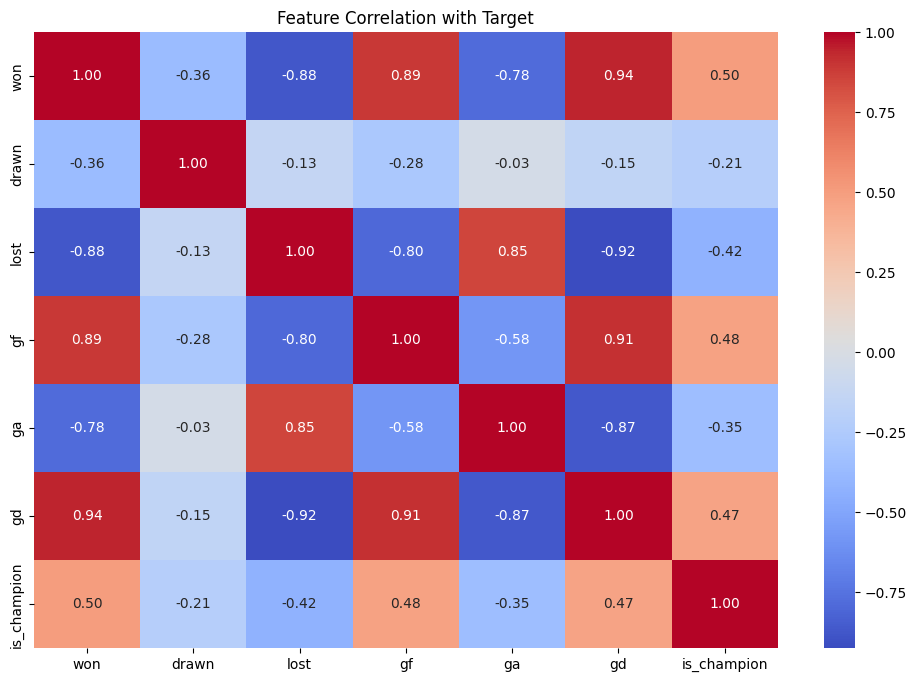

In [21]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist() #list of cols
numeric_features.remove('is_champion')
corr_matrix = df[numeric_features + ['is_champion']].corr() #makes matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Target")
plt.show()

In [22]:
df.head()


,won,drawn,lost,gf,ga,gd,is_champion
0,25,7,6,73,35,38,1
1,24,6,8,66,37,29,0
2,20,11,7,70,34,36,0
3,18,9,11,52,35,17,0
4,17,12,9,49,32,17,0


In [23]:
import pandas as pd


numeric_cols = ['won', 'drawn', 'lost', 'gf', 'ga', 'gd']


outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col]


for col, vals in outliers.items():
    print(f"\nOutliers in {col}:\n", vals)



Outliers in won:
 440    32
460    32
480    32
Name: won, dtype: int64

Outliers in drawn:
 Series([], Name: drawn, dtype: int64)

Outliers in lost:
 Series([], Name: lost, dtype: int64)

Outliers in gf:
 80      97
280    103
320     93
321     89
360    102
361    101
440    106
460     95
461     89
481    102
520     99
521     94
540     94
560     96
561     91
Name: gf, dtype: int64

Outliers in ga:
 61      17
180     15
259     89
378     85
539     84
577     85
579    104
Name: ga, dtype: int64

Outliers in gd:
 259   -69
280    71
320    64
360    65
440    79
460    72
461    67
481    67
520    73
521    68
579   -69
Name: gd, dtype: int64


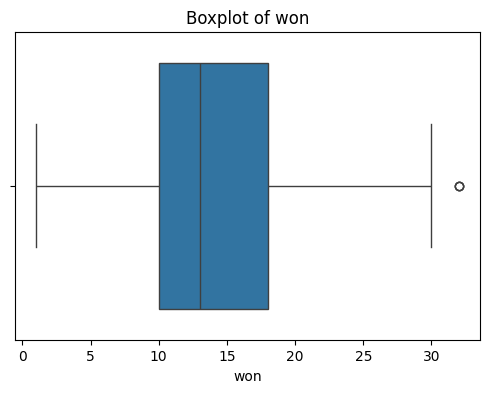

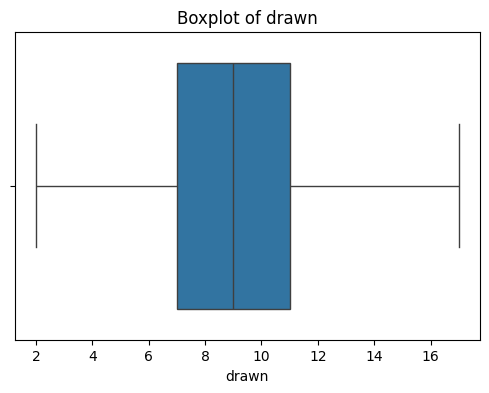

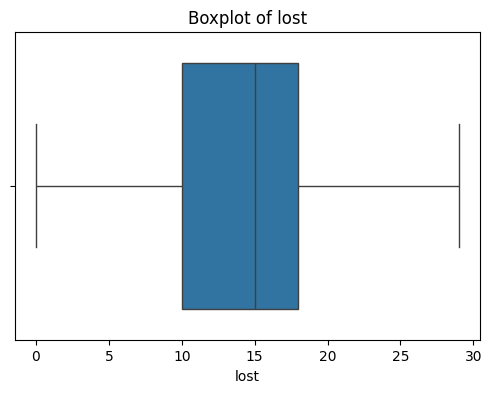

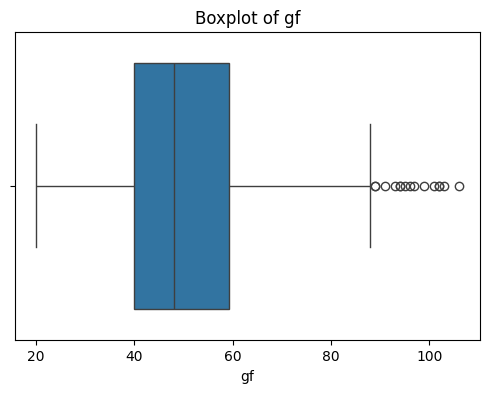

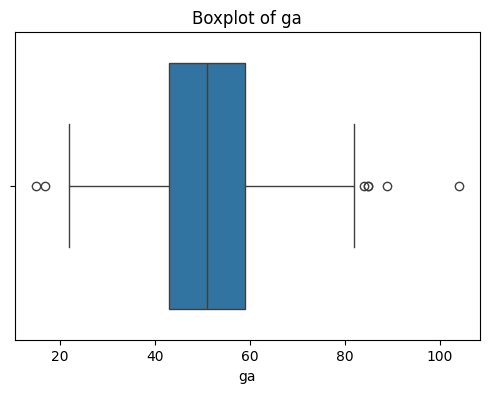

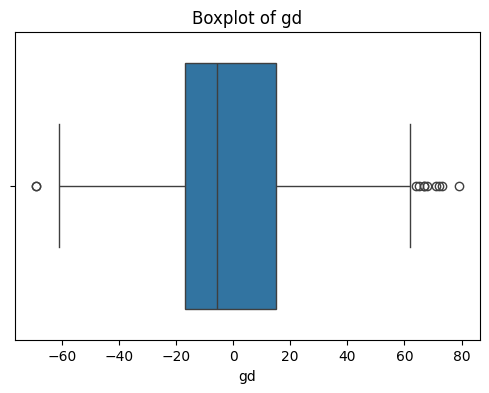

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


<h3>Logistic Regression</h3>

In [25]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['is_champion'])
y=df['is_champion']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y #random_state for same train-test split and stratify to ensure that if the dataset contains 5 percent teams as champions then both train and test will have 5 percent
)

In [26]:
X.head()

,won,drawn,lost,gf,ga,gd
0,25,7,6,73,35,38
1,24,6,8,66,37,29
2,20,11,7,70,34,36
3,18,9,11,52,35,17
4,17,12,9,49,32,17


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
# Initialize and train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy: 0.9741379310344828


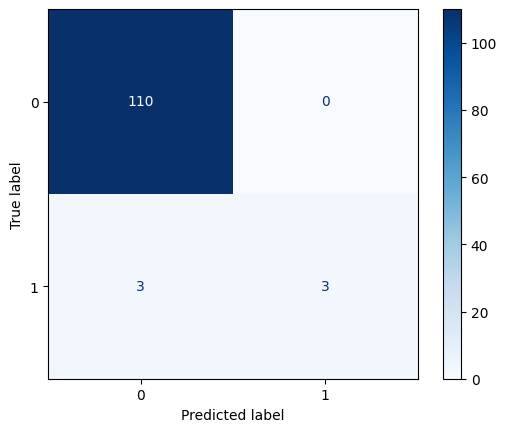

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")


In [29]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1 (for the champion class = 1)
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

# Full classification report (both classes)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9741379310344828
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       110
           1       1.00      0.50      0.67         6

    accuracy                           0.97       116
   macro avg       0.99      0.75      0.83       116
weighted avg       0.97      0.97      0.97       116



<h3>Improving Recall by Tuning</h3>

The model suffers from Class imbalance

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_thresh = (y_pred_proba >= 0.3).astype(int)  # lower threshold

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


[[63 47]
 [ 0  6]]
              precision    recall  f1-score   support

           0       1.00      0.57      0.73       110
           1       0.11      1.00      0.20         6

    accuracy                           0.59       116
   macro avg       0.56      0.79      0.47       116
weighted avg       0.95      0.59      0.70       116



C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


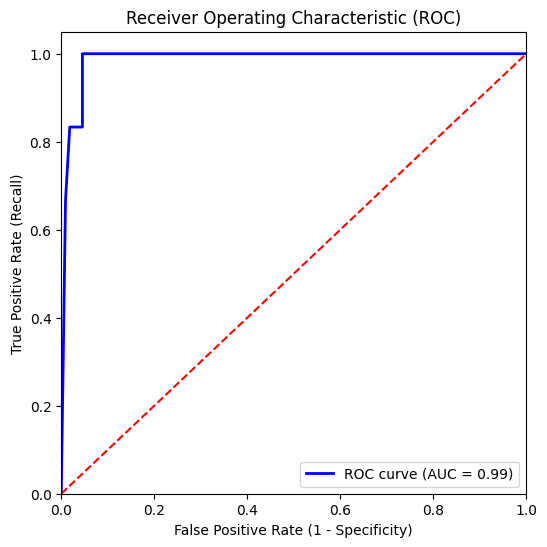

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (champion = 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # random baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Best Threshold = 1.000, TPR = 1.000, FPR = 0.045


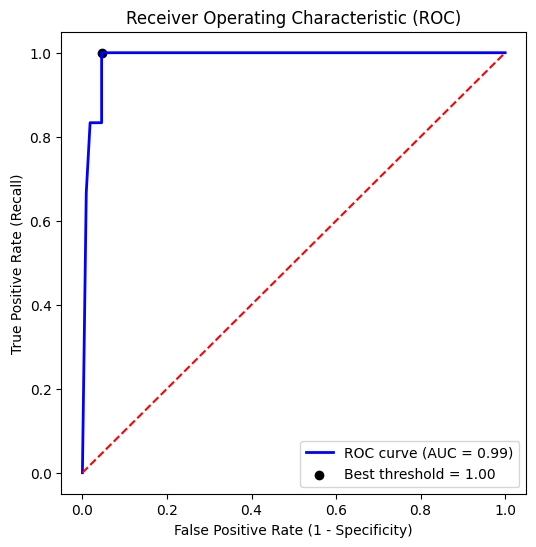

In [32]:
# Compute Youden’s J statistic = TPR - FPR
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]

print(f'Best Threshold = {best_thresh:.3f}, TPR = {tpr[ix]:.3f}, FPR = {fpr[ix]:.3f}')

# Plot threshold point on ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label=f'Best threshold = {best_thresh:.2f}')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [33]:
# Apply optimal threshold
y_pred_optimal = (y_pred_proba >= best_thresh).astype(int)

# Evaluate again
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_optimal)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred_optimal, digits=3))

Confusion Matrix:
 [[105   5]
 [  0   6]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.955     0.977       110
           1      0.545     1.000     0.706         6

    accuracy                          0.957       116
   macro avg      0.773     0.977     0.841       116
weighted avg      0.976     0.957     0.963       116



In [34]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np

# Compute PR curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute F1 for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Find best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best Threshold = {best_threshold:.3f}, F1 = {best_f1:.3f}, Precision = {precision[best_idx]:.3f}, Recall = {recall[best_idx]:.3f}")


Best Threshold = 1.000, F1 = 0.769, Precision = 0.714, Recall = 0.833


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_thresh = (y_pred_proba >= best_threshold).astype(int)  # lower threshold

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[108   2]
 [  1   5]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.71      0.83      0.77         6

    accuracy                           0.97       116
   macro avg       0.85      0.91      0.88       116
weighted avg       0.98      0.97      0.98       116



C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


The values given above is the best result we can obtain using Logistic regression

<h3>Random Forrest (to improve recall)</h3>

Random Forest Accuracy: 0.9396551724137931

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       110
           1       0.33      0.17      0.22         6

    accuracy                           0.94       116
   macro avg       0.64      0.57      0.60       116
weighted avg       0.92      0.94      0.93       116



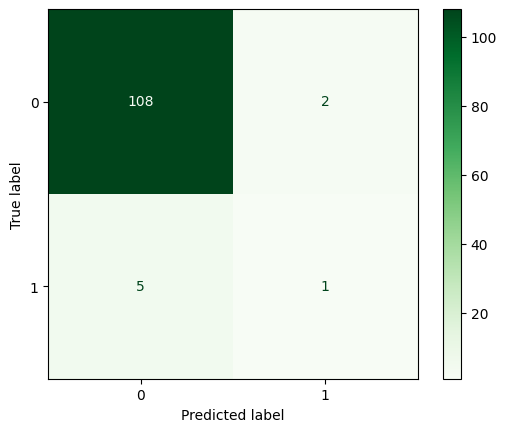

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,          # let trees grow until pure
    class_weight="balanced", # handles imbalance
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap="Greens")

# Classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


<h3>Hyperparameter Tuning on Random Forrest</h3>

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [{0:1, 1:5}],
}

# Grid search with 5-fold cross-validation, scoring by recall
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',   # Focus on recall for champions
    cv=5,
    n_jobs=-1,          # Use all cores
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': {0: 1, 1: 5}, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Recall Score: 0.7291375291375292


In [38]:
X_train.columns

Index(['won', 'drawn', 'lost', 'gf', 'ga', 'gd'], dtype='object')

In [39]:
from sklearn.metrics import classification_report, recall_score

# Get predicted probabilities for the positive class
y_probs = best_rf.predict_proba(X_test)[:,1]

# Use a lower threshold to predict more positives
threshold = 0.3  # adjust as needed
y_pred = (y_probs >= threshold).astype(int)

# Evaluate performance
print(classification_report(y_test, y_pred))
print("Recall at threshold", threshold, ":", recall_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.71      0.83      0.77         6

    accuracy                           0.97       116
   macro avg       0.85      0.91      0.88       116
weighted avg       0.98      0.97      0.98       116

Recall at threshold 0.3 : 0.8333333333333334


My focus has been on increasing the recall and f1 score. As in this problem statement, it is more important to focus on f1 score instead of accuracy.

In [40]:
import joblib
joblib.dump(best_rf,"league_winner_model.pkl")

['league_winner_model.pkl']

In [41]:
import joblib
model = joblib.load('league_winner_model.pkl')

# How many columns the model expects
print("n_features_in_:", getattr(model, "n_features_in_", None))

# If sklearn saved feature names (newer versions), inspect them
print("feature_names_in_:", getattr(model, "feature_names_in_", None))


n_features_in_: 6
feature_names_in_: ['won' 'drawn' 'lost' 'gf' 'ga' 'gd']


In [46]:
# construct example (be careful to match model input order)
example = np.array([[30, 4, 4, 50, 50, 0]])  # adjust order if needed

proba = model.predict_proba(example)[0,1]
print("Champion probability:", proba)


Champion probability: 0.386371336996337


C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
if hasattr(model, "feature_names_in_"):
    names = list(model.feature_names_in_)
    # build a dict with your inputs mapped to those names, e.g.
    row = {name: 0 for name in names}
    # fill in known fields:
    row['won'] = 30
    row['drawn'] = 4
    row['lost']=4
    row['gf']=80
    row['ga']=30
    row['gd']=50
    X_input = np.array([ [row[name] for name in names] ])
    print("Input shape:", X_input.shape)
    print("Proba:", model.predict_proba(X_input)[0,1])


Input shape: (1, 6)
Proba: 0.9444781444046148


C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
import joblib
joblib.dump(model, "model_latest.joblib")


['model_latest.joblib']